In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as mt


In [2]:
data = pd.read_csv('../../data/IceCreamData.csv')


In [3]:
X = np.array(data['Temperature']).reshape(-1, 1)
y = np.array(data['Revenue']).reshape(-1, 1)

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Bagging modelini kuruyoruz (DecisionTreeRegressor'u base estimator olarak kullanıyoruz)
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Modeli eğitim verisiyle eğitiyoruz
bagging.fit(X_train, y_train)

# Test verisiyle tahmin yapıyoruz
predict = bagging.predict(X_test)


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [5]:
print(f'R2: {mt.r2_score(y_test, predict):.4f}  MSE: {mt.mean_squared_error(y_test, predict):.4f}')


R2: 0.9638  MSE: 1032.8489


In [6]:
params = {'n_estimators': [10, 50, 100], 'base_estimator__max_depth': [3, 5, 10], 'base_estimator__min_samples_split': [2, 5, 10]}

CV = GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()), param_grid=params, cv=10)
CV.fit(X_train, y_train)


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508:

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': [3, 5, 10],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [7]:
print(CV.best_params_)


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}


In [8]:
best_bagging = CV.best_estimator_
best_bagging.fit(X_train, y_train)


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                 n_estimators=100)

In [9]:
predict_best_bagging = best_bagging.predict(X_test)


In [10]:
print(f'Best Bagging R2: {mt.r2_score(y_test, predict_best_bagging):.4f}  MSE: {mt.mean_squared_error(y_test, predict_best_bagging):.4f}')


Best Bagging R2: 0.9732  MSE: 764.1634


C:\Users\firat\AppData\Local\Temp\ipykernel_9468\2666081588.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


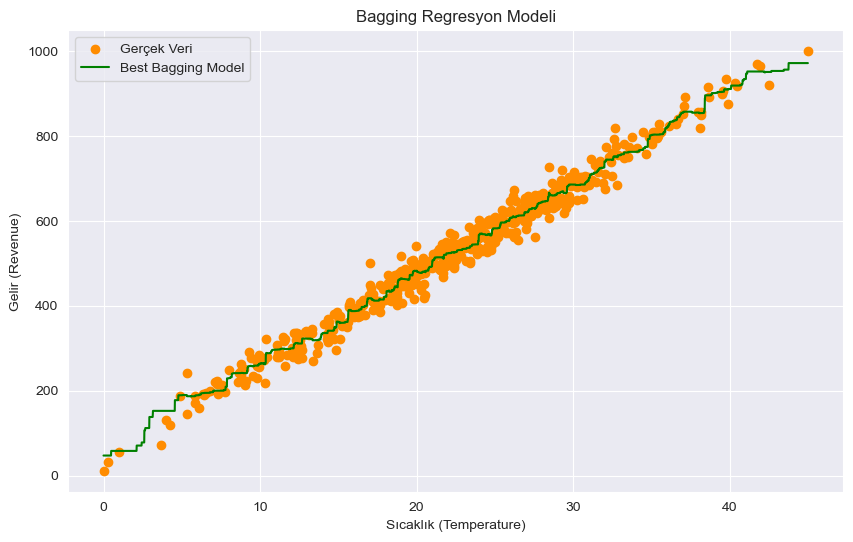

In [11]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
y_grid_bagging = best_bagging.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Gerçek Veri')
plt.plot(X_grid, y_grid_bagging, color='green', label='Best Bagging Model')
plt.xlabel('Sıcaklık (Temperature)')
plt.ylabel('Gelir (Revenue)')
plt.title('Bagging Regresyon Modeli')
plt.legend()
plt.show()
